# Download data

Download ephys data from the original paper from EBRAINS: https://search.kg.ebrains.eu/instances/a25f722e-f9b1-4f32-80bc-37206c2d1536

Navigate to `data/ecephys/`, open the two directories, select the NWB files, and click "Download file" on the right. Move the files to a new `data` directory in the base directory of this repo.

- `102335_2022-Jul-01_09-28-53.nwb` (15 GB)
- `104638_2023-Feb-10_11-04-33.nwb` (3 GB)

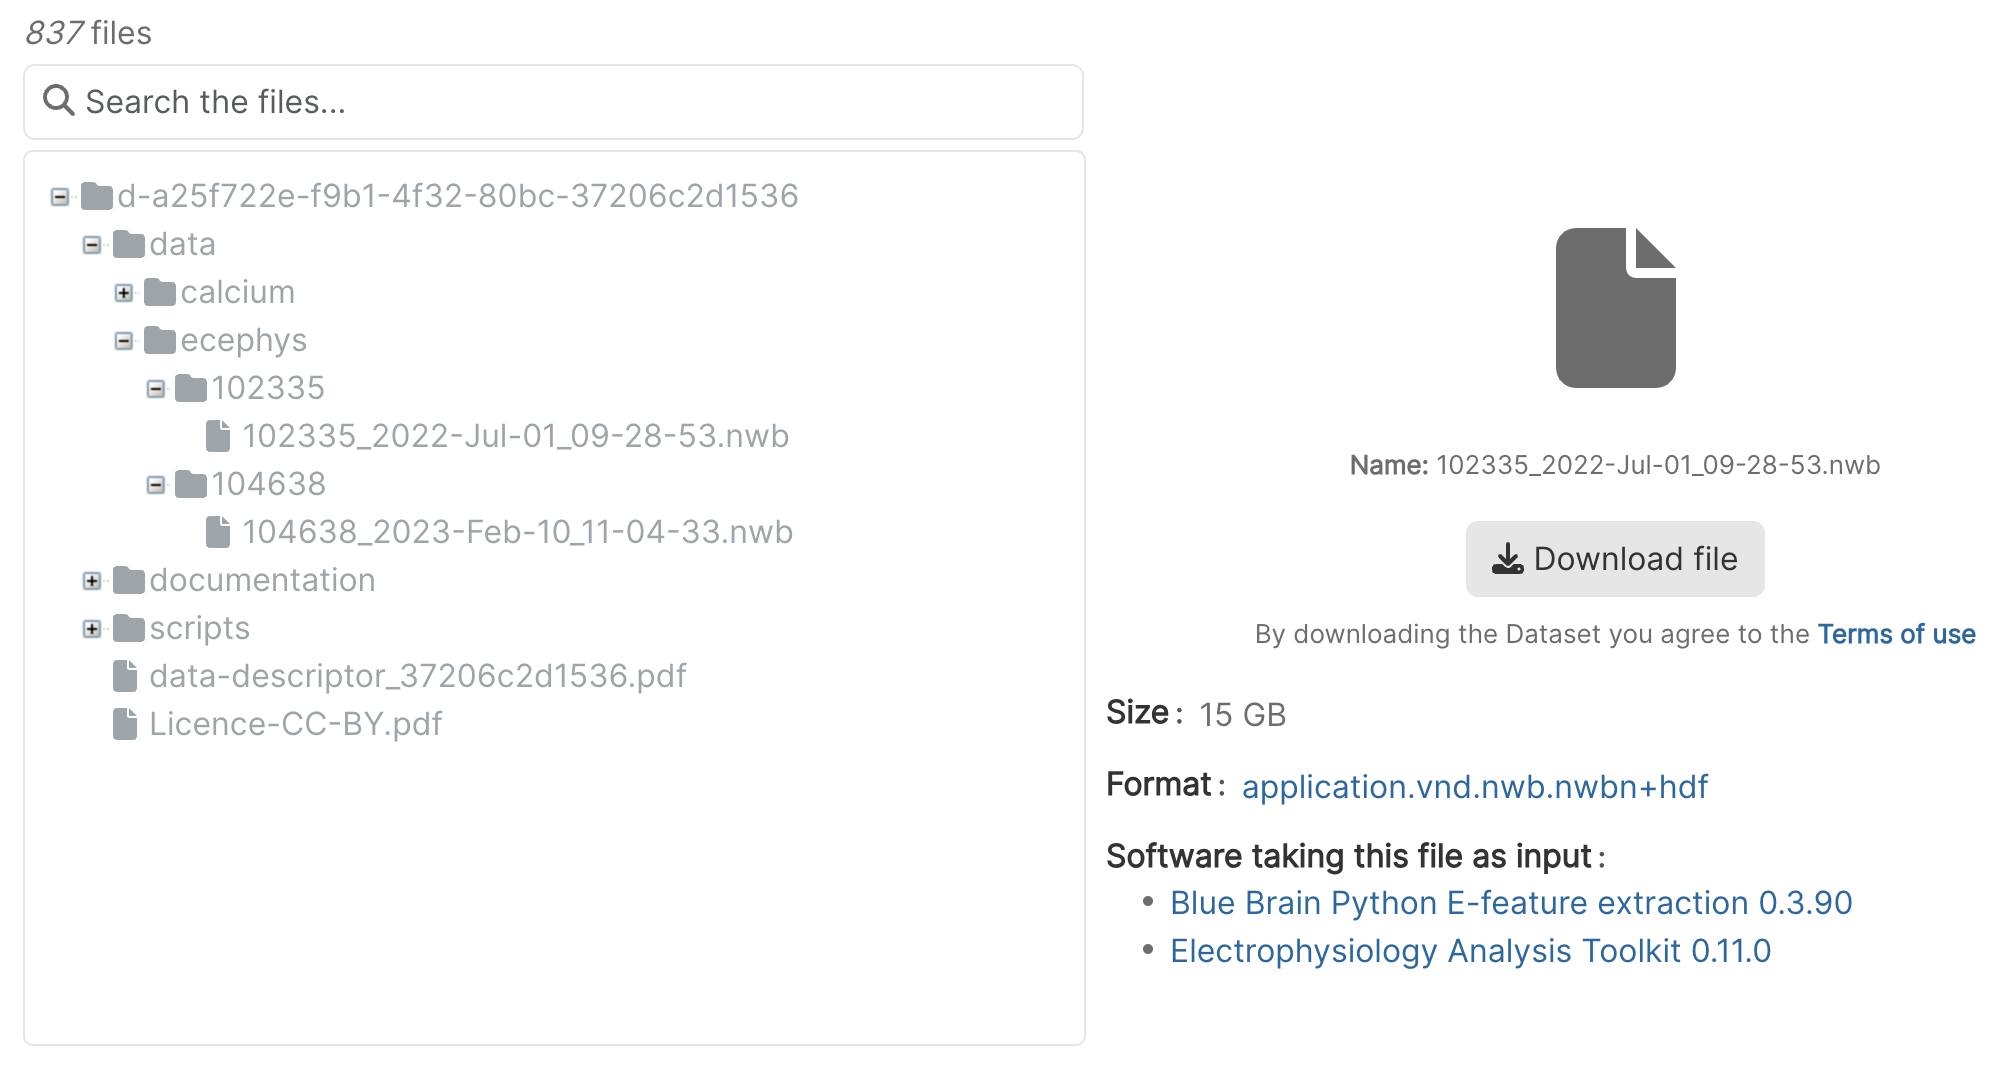

# Open the original data using pynwb

In [124]:
import pynwb

# mouse 104638, used only good units (N=469)
# mouse 102235, used both good and mua units (N=410)
# also all the plots show a time axis going from 0 to 1500 seconds
# mouse 102235 spike times go to 9086
# mouse 104638 spike times go to 3758
mouse = 104638
if mouse == 104638:
    file_path = "data/104638_2023-Feb-10_11-04-33.nwb"  # one probe
elif mouse == 102235:
    file_path = "data/102335_2022-Jul-01_09-28-53.nwb"  # two probes
else:
    raise ValueError("unknown mouse " + mouse)
io = pynwb.NWBHDF5IO(file_path, "r")
nwbfile = io.read()
nwbfile

/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,24.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
1,-8.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
2,24.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
3,-8.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,24.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
1,-8.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
2,24.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240\nFields:\n description: ground cerebellum\n device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935


In [125]:
electrodes_df = nwbfile.electrodes.to_dataframe()
electrodes_df

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,24.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
1,-8.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
2,24.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
3,-8.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
4,24.0,250.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
...,...,...,...,...,...,...,...,...
3931,742.0,895.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
3932,774.0,910.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
3933,742.0,910.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935


In [126]:
electrodes_df.iloc[382:386]

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
3934,774.0,925.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935
3935,742.0,925.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935


In [127]:
electrodes_df["location"].unique()

array(['MEC - Layer 2, MEC - Layer 3, MEC - Layer 5'], dtype=object)

In [128]:
electrodes_df[electrodes_df["location"] == "MEC - Layer 2, MEC - Layer 3, MEC - Layer 5"]["group"].unique()

array([probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240
       Fields:
         description: ground cerebellum
         device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704
       Fields:
         description: neuropixels 2.0 - MS

         location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5                                       ],
      dtype=object)

In [129]:
electrodes_df[electrodes_df["location"] == "HP - CA1"]["group"].unique()

array([], dtype=object)

In [130]:
probe0_group = electrodes_df[electrodes_df["location"] == "MEC - Layer 2, MEC - Layer 3, MEC - Layer 5"]["group"][0]
if mouse == 102235:
    probe1_group = electrodes_df[electrodes_df["location"] == "HP - CA1"]["group"].iloc[0]
probe0_group

probe_0 - 0-143; 1280-1423; 2608-2655; 3888-3935 pynwb.ecephys.ElectrodeGroup at 0x14430360240
Fields:
  description: ground cerebellum
  device: npx_104638_20403314511 pynwb.device.Device at 0x14425572704
Fields:
  description: neuropixels 2.0 - MS

  location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5

In [131]:
units_df = nwbfile.units.to_dataframe()
units_df

,sampling_rate,cluster_quality,spike_times,electrodes,electrode_group,waveform_mean
id,,,,,,
1,30000.0,good,"[0.15753333333333333, 0.9143333333333333, 1.70...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-112.794, -112.996, -114.298, -116.092, -115...."
2,30000.0,good,"[0.18773333333333334, 0.2042, 0.21153333333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-187.58, -188.31, -189.442, -187.018, -187.77..."
6,30000.0,mua,"[1.2314333333333334, 1.5099333333333333, 4.412...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-265.498, -265.48, -265.854, -268.986, -271.5..."
11,30000.0,mua,"[0.4508333333333333, 0.46846666666666664, 2.99...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-255.18, -255.198, -255.084, -252.862, -253.8..."
13,30000.0,mua,"[0.4997, 1.6344, 1.7394333333333334, 2.4495, 2...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-67.132, -67.682, -67.666, -67.908, -70.09, -..."
...,...,...,...,...,...,...
1554,30000.0,good,"[0.97, 1.2236666666666667, 3.942, 4.6043333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-357.456, -361.256, -364.802, -364.976, -364...."
1555,30000.0,mua,"[4.1681333333333335, 13.200766666666667, 13.59...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[51.336, 50.938, 48.558, 48.248, 48.27, 47.898..."
1557,30000.0,good,"[74.07226666666666, 124.5477, 199.051533333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-372.96, -373.092, -375.668, -376.848, -378.9..."


In [132]:
# the numbering of unit id's resets, and there are now two 0s
if mouse == 102235:
    units_df.iloc[1000:1050].index

In [133]:
sorted(units_df.index)[:10]

[1, 2, 6, 11, 13, 14, 17, 18, 19, 20]

In [134]:
units_df.cluster_quality.unique()

array(['good', 'mua'], dtype=object)

In [135]:
units_df.electrode_group == probe0_group

id
1       True
2       True
6       True
11      True
13      True
        ... 
1554    True
1555    True
1557    True
1558    True
1559    True
Name: electrode_group, Length: 988, dtype: bool

In [137]:
if mouse == 102235:
    mec_units = units_df[units_df.electrode_group == probe0_group]
else:
    mec_units = units_df[(units_df.electrode_group == probe0_group) & (units_df.cluster_quality == "good")]    
mec_units

,sampling_rate,cluster_quality,spike_times,electrodes,electrode_group,waveform_mean
id,,,,,,
1,30000.0,good,"[0.15753333333333333, 0.9143333333333333, 1.70...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-112.794, -112.996, -114.298, -116.092, -115...."
2,30000.0,good,"[0.18773333333333334, 0.2042, 0.21153333333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-187.58, -188.31, -189.442, -187.018, -187.77..."
21,30000.0,good,"[0.148, 1.6468666666666667, 2.8585666666666665...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-15.418, -16.594, -17.388, -15.974, -18.698, ..."
22,30000.0,good,"[0.23336666666666667, 0.3891, 0.45266666666666...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[27.372, 26.296, 23.164, 22.386, 20.284, 16.59..."
24,30000.0,good,"[0.35763333333333336, 0.8004666666666667, 0.83...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-331.292, -330.81, -332.068, -331.464, -333.6..."
...,...,...,...,...,...,...
1553,30000.0,good,"[1.8646, 2.825833333333333, 11.424333333333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-128.092, -130.01, -130.164, -132.378, -131.4..."
1554,30000.0,good,"[0.97, 1.2236666666666667, 3.942, 4.6043333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-357.456, -361.256, -364.802, -364.976, -364...."
1557,30000.0,good,"[74.07226666666666, 124.5477, 199.051533333333...",x y z imp ...,probe_0 - 0-143; 1280-1423; 2608-2655; 3888-39...,"[-372.96, -373.092, -375.668, -376.848, -378.9..."


In [138]:
# mouse 104638, used only good units (N=469) -- but we see N=487
# mouse 102235, used both good and mua units (N=410). note that probe1 has 499 units.

In [139]:
# some units barely spike
# sorted([len(mec_units["spike_times"][i]) for i in mec_units.index])

In [140]:
assert len(mec_units.index) == len(mec_units.index.unique())

In [224]:
# get start time of wheel task
# if mouse == 102335:
epochs = nwbfile.epochs.to_dataframe()
wheel_start = epochs[epochs["task"] == "Wheel-HeadFixed"]["start_time"].item()
wheel_end = epochs[epochs["task"] == "Wheel-HeadFixed"]["stop_time"].item()
print(wheel_start, wheel_end)

1932.0 3772.0


In [141]:
import pynapple as nap
import numpy as np
nap.nap_config.set_backend("jax")

In [142]:
# nap_nwb = nap.load_file(file_path)
# nap_nwb

In [143]:
# type(nap_nwb["units"][0])

In [144]:
# mec_units["spike_times"][0]

In [145]:
# manually construct tsgroup based on spike times from nwb file read from pynwb
# selected_unit_indices = range(21, 30)
selected_unit_indices = range(len(mec_units))
mec_tsgroup = nap.TsGroup({i: nap.Ts(mec_units["spike_times"][i]) for i in mec_units.index[selected_unit_indices]})

In [146]:
mec_tsgroup

Index    rate
-------  --------
1        1.00182
2        24.67083
21       1.05158
22       1.56699
24       1.04838
25       2.65103
27       5.16742
...      ...
1549     0.59125
1552     0.65404
1553     0.32862
1554     0.53377
1557     0.23655
1558     0.59524
1559     1.48982

In [147]:
len(mec_tsgroup)

487

In [228]:
mec_tsgroup_wheel = mec_tsgroup.restrict(nap.IntervalSet(start=wheel_start, end=wheel_end))

In [229]:
mec_tsgroup_wheel[1]

Time (s)
1936.8831
1937.123966667
1944.3377
1949.8706
1954.7697
1954.780133333
1954.8551
...
3739.795566667
3747.538633333
3747.650966667
3747.668
3747.916333333
3747.922833333
3753.1049
shape: 1635

In [230]:
bin_size = 0.120
count = mec_tsgroup_wheel.count(bin_size)
count

/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)


Time (s)      1    2    21    22    24  ...
----------  ---  ---  ----  ----  ----  -----
1932.06       0    5     1     0     0  ...
1932.18       0    1     0     0     0  ...
1932.3        0    3     1     0     0  ...
1932.42       0    6     0     0     0  ...
1932.54       0    3     0     2     1  ...
1932.66       0    6     0     0     0  ...
1932.78       0    5     0     0     0  ...
...
3771.18       0    0     0     0     0  ...
3771.3        0    0     0     0     0  ...
3771.42       0    0     0     0     0  ...
3771.54       0    0     0     0     0  ...
3771.66       0    0     0     0     0  ...
3771.78       0    0     0     0     0  ...
3771.9        0    0     0     0     0  ...
dtype: int32, shape: (15333, 487)

In [231]:
type(count)

pynapple.core.time_series.TsdFrame

In [232]:
# paper used a smoothing kernel of 5 seconds (!)
smoothed_binned_matrix = count.smooth(std=5)

In [233]:
smoothed_binned_matrix

Time (s)              0           1            2            3            4  ...
----------  -----------  ----------  -----------  -----------  -----------  -----
1932.06     0.0121023    1.69218     0.0730024    0.118764     0.0226055    ...
1932.18     0.0124182    1.72744     0.0743107    0.120833     0.0231491    ...
1932.3      0.0127354    1.76283     0.0756221    0.122891     0.0237016    ...
1932.42     0.0130537    1.79833     0.0769364    0.124937     0.0242633    ...
1932.54     0.0133727    1.83393     0.0782535    0.126969     0.0248341    ...
1932.66     0.0136922    1.8696      0.0795732    0.128986     0.0254142    ...
1932.78     0.0140118    1.90534     0.0808953    0.130987     0.0260037    ...
...
3771.18     1.2149e-05   0.00825802  0.000700656  0.000590629  3.9542e-06   ...
3771.3      1.10908e-05  0.00768458  0.000652153  0.000551459  3.57681e-06  ...
3771.42     1.01191e-05  0.00714701  0.000606669  0.000514594  3.23358e-06  ...
3771.54     9.22735e-06  0.0066433

In [234]:
type(smoothed_binned_matrix)

pynapple.core.time_series.TsdFrame

In [235]:
smoothed_binned_matrix.columns
# NOTE: the column names have been reset

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486],
      dtype='int64', length=487)

In [236]:
np.max(smoothed_binned_matrix.loc[0])

Array(0.51272017, dtype=float32)

In [237]:
np.std(smoothed_binned_matrix.loc[0])

Array(0.08248404, dtype=float32)

In [238]:
smoothed_binned_matrix.times()

array([1932.06, 1932.18, 1932.3 , ..., 3771.66, 3771.78, 3771.9 ])

In [239]:
smoothed_binned_matrix.shape

(15333, 487)

In [240]:
# binarize each spike train
smoothed_binned_matrix_binary_arr = np.zeros(smoothed_binned_matrix.shape)
for i, unit in enumerate(smoothed_binned_matrix.columns):
    cond = smoothed_binned_matrix.loc[unit] >= (np.mean(smoothed_binned_matrix.loc[unit]) + 1 * np.std(smoothed_binned_matrix.loc[unit]))
    cond.data
    # print(np.unique(cond))
    # print(np.sum(cond))
    # print(cond)
    # print(cond.as_array().astype(int))
    smoothed_binned_matrix_binary_arr[:,i] = cond.as_array().astype(int)

smoothed_binned_matrix_binary = nap.TsdFrame(
    t=smoothed_binned_matrix.times(),
    d=smoothed_binned_matrix_binary_arr,
    # columns=smoothed_binned_matrix.columns,
    columns=mec_tsgroup.keys(),
)

/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/si

In [241]:
smoothed_binned_matrix_binary

Time (s)      1    2    21    22    24  ...
----------  ---  ---  ----  ----  ----  -----
1932.06       0    0     0     0     0  ...
1932.18       0    0     0     0     0  ...
1932.3        0    0     0     0     0  ...
1932.42       0    0     0     0     0  ...
1932.54       0    0     0     0     0  ...
1932.66       0    0     0     0     0  ...
1932.78       0    0     0     0     0  ...
...
3771.18       0    0     0     0     0  ...
3771.3        0    0     0     0     0  ...
3771.42       0    0     0     0     0  ...
3771.54       0    0     0     0     0  ...
3771.66       0    0     0     0     0  ...
3771.78       0    0     0     0     0  ...
3771.9        0    0     0     0     0  ...
dtype: float32, shape: (15333, 487)

In [242]:
sum(np.sum(smoothed_binned_matrix_binary.values, axis=0)>0)

Array(487, dtype=int32, weak_type=True)

"While the sorting and visualization of neural population activity were performed as we did in calcium imaging data, there was one difference in how the two datasets were analysed. Because in the Neuropixels data the periodic sequences were more salient in some subsets of the sessions than others, for visualization purposes we calculated the sorting on a subset of the smoothed transition matrices. Those subsets are given by [1,200, 1,700] s for the example session of mouse no. 104368 (Fig. 2f) and [1,100, 1,400] s for the example session of mouse no. 102335 (Extended Data Fig. 4g). Note, however, that sequences were identified outside these session subsets too, indicating that the sorting unveils stereotyped sequences also outside the used subsets of data (see ‘Sortings are preserved when different portions of data are used for obtaining the sortings’)."

In [243]:
if mouse == 102235:
    chunk_ini = 1100
    chunk_end = 1400
elif mouse == 104638:
    chunk_ini = 1200
    chunk_end = 1700

In [244]:
smoothed_binned_matrix_binary.t[chunk_ini*8]

3084.06

In [245]:
smoothed_binned_matrix_binary.t[chunk_end*8]

3564.06

In [246]:
# it seems like the restriction happens on the non-trimmed data
temp = smoothed_binned_matrix_binary.restrict(nap.IntervalSet(
    start=smoothed_binned_matrix_binary.t[chunk_ini*8],
    end=smoothed_binned_matrix_binary.t[chunk_end*8]
))
temp

Time (s)      1    2    21    22    24  ...
----------  ---  ---  ----  ----  ----  -----
3084.06       1    0     0     0     1  ...
3084.18       1    0     0     0     1  ...
3084.3        1    0     0     0     1  ...
3084.42       1    0     0     0     1  ...
3084.54       1    0     0     0     1  ...
3084.66       1    0     0     0     1  ...
3084.78       1    0     0     0     1  ...
...
3563.34       1    1     0     0     0  ...
3563.46       1    1     0     0     0  ...
3563.58       1    1     0     0     0  ...
3563.7        1    1     0     0     0  ...
3563.82       1    1     0     0     0  ...
3563.94       1    1     0     0     0  ...
3564.06       1    1     0     0     0  ...
dtype: float32, shape: (4001, 487)

In [247]:
sum(np.sum(temp.values, axis=0)>=50)

Array(424, dtype=int32, weak_type=True)

In [249]:
# keep only data after 5 minutes
trimmed_smoothed_binned_matrix_binary = smoothed_binned_matrix_binary.restrict(nap.IntervalSet(start=wheel_start+5*60, end=max(smoothed_binned_matrix_binary.times())))
trimmed_smoothed_binned_matrix_binary

Time (s)      1    2    21    22    24  ...
----------  ---  ---  ----  ----  ----  -----
2232.06       0    0     0     0     0  ...
2232.18       0    0     0     0     0  ...
2232.3        0    0     0     0     0  ...
2232.42       0    0     0     0     0  ...
2232.54       0    0     0     0     0  ...
2232.66       0    0     0     0     0  ...
2232.78       0    0     0     0     0  ...
...
3771.18       0    0     0     0     0  ...
3771.3        0    0     0     0     0  ...
3771.42       0    0     0     0     0  ...
3771.54       0    0     0     0     0  ...
3771.66       0    0     0     0     0  ...
3771.78       0    0     0     0     0  ...
3771.9        0    0     0     0     0  ...
dtype: float32, shape: (12833, 487)

In [250]:
import pandas as pd
import numpy as np
def my_compute_autocorrelogram(
    group, binsize, windowsize, time_units="s"
):
    newgroup = group
    autocorrs = {}

    binsize = nap.TsIndex.format_timestamps(
        np.array([binsize], dtype=np.float64), time_units
    )[0]
    windowsize = nap.TsIndex.format_timestamps(
        np.array([windowsize], dtype=np.float64), time_units
    )[0]

    for n in newgroup.keys():
        spk_time = newgroup[n].index
        auc, times = nap.process.correlograms._cross_correlogram(spk_time, spk_time, binsize, windowsize)
        autocorrs[n] = pd.Series(index=np.round(times, 6), data=auc, dtype="float")

    autocorrs = pd.DataFrame.from_dict(autocorrs)

    # DO NOT normalize
    # DO NOT zero out the center

    return autocorrs.astype("float")

In [251]:
# testing pynapple compute_autocorrelogram normalization
# with norm=True, values are still > 1...
# binsize = 5
# aa = nap.process.compute_autocorrelogram(nap.TsGroup({0: mec_units["spike_times"][0]}), binsize=binsize, windowsize=560, norm=False)
# bb = my_compute_autocorrelogram(nap.TsGroup({0: mec_units["spike_times"][0]}), binsize=binsize, windowsize=560)
# print(aa[-5:5])
# print(bb[-5:5])

In [252]:
# can't use binned matrices here i think - 
# use https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html instead?
# binsize = 1
# acorr_1 = my_compute_autocorrelogram(mec_tsgroup, binsize=binsize, windowsize=560)
# acorr = acorr_1
# acorr_1

In [253]:
binsize = 0.120
acorr_120 = my_compute_autocorrelogram(mec_tsgroup, binsize=binsize, windowsize=560)
acorr = acorr_120
acorr_120

,1,2,21,22,24,25,27,31,39,47,...,1543,1544,1547,1549,1552,1553,1554,1557,1558,1559
-559.92,0.770252,21.484733,0.942561,1.467425,1.135787,2.766904,4.944645,0.320293,1.514798,2.853655,...,0.332767,0.528374,0.273771,0.596310,0.559398,0.256410,0.540047,0.318710,0.771122,1.486873
-559.80,0.834440,21.496777,0.993168,1.471670,1.258460,2.717555,5.093117,0.234500,1.555036,2.708727,...,0.339847,0.520053,0.307158,0.450045,0.613643,0.296896,0.498504,0.253093,0.815825,1.387152
-559.68,0.688358,21.462173,0.980516,1.388181,1.175973,2.783633,5.101270,0.297415,1.504413,2.933995,...,0.318607,0.478449,0.347222,0.435044,0.583130,0.296896,0.618976,0.281215,0.741320,1.400548
-559.56,0.666224,21.560322,0.841346,1.444784,1.180203,2.638931,5.053210,0.354610,1.623832,2.916667,...,0.311526,0.470128,0.320513,0.510051,0.593301,0.249663,0.577434,0.262467,0.786023,1.434780
-559.44,0.752545,21.555828,0.961538,1.351390,1.220389,2.717555,5.051922,0.354610,1.448598,2.830813,...,0.311526,0.507572,0.373932,0.517552,0.633984,0.283401,0.564972,0.206224,0.778572,1.494314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,0.752545,21.555648,0.959430,1.352805,1.220389,2.716719,5.051922,0.354610,1.448598,2.830025,...,0.311526,0.507572,0.373932,0.517552,0.633984,0.283401,0.564972,0.206224,0.778572,1.494314
559.56,0.666224,21.561490,0.843455,1.444784,1.180203,2.638931,5.053639,0.354610,1.623832,2.915091,...,0.311526,0.470128,0.320513,0.510051,0.593301,0.249663,0.577434,0.262467,0.786023,1.434780
559.68,0.688358,21.461005,0.978408,1.386766,1.175973,2.784469,5.100841,0.297415,1.503115,2.937146,...,0.318607,0.478449,0.347222,0.435044,0.583130,0.296896,0.618976,0.281215,0.741320,1.397571
559.80,0.834440,21.496058,0.995277,1.473085,1.258460,2.715882,5.093117,0.234500,1.556334,2.707940,...,0.339847,0.520053,0.307158,0.450045,0.613643,0.296896,0.498504,0.253093,0.815825,1.390129


In [254]:
np.max(acorr)

116.70851829050967

In [255]:
type(acorr)

pandas.core.frame.DataFrame

In [256]:
acorr

,1,2,21,22,24,25,27,31,39,47,...,1543,1544,1547,1549,1552,1553,1554,1557,1558,1559
-559.92,0.770252,21.484733,0.942561,1.467425,1.135787,2.766904,4.944645,0.320293,1.514798,2.853655,...,0.332767,0.528374,0.273771,0.596310,0.559398,0.256410,0.540047,0.318710,0.771122,1.486873
-559.80,0.834440,21.496777,0.993168,1.471670,1.258460,2.717555,5.093117,0.234500,1.555036,2.708727,...,0.339847,0.520053,0.307158,0.450045,0.613643,0.296896,0.498504,0.253093,0.815825,1.387152
-559.68,0.688358,21.462173,0.980516,1.388181,1.175973,2.783633,5.101270,0.297415,1.504413,2.933995,...,0.318607,0.478449,0.347222,0.435044,0.583130,0.296896,0.618976,0.281215,0.741320,1.400548
-559.56,0.666224,21.560322,0.841346,1.444784,1.180203,2.638931,5.053210,0.354610,1.623832,2.916667,...,0.311526,0.470128,0.320513,0.510051,0.593301,0.249663,0.577434,0.262467,0.786023,1.434780
-559.44,0.752545,21.555828,0.961538,1.351390,1.220389,2.717555,5.051922,0.354610,1.448598,2.830813,...,0.311526,0.507572,0.373932,0.517552,0.633984,0.283401,0.564972,0.206224,0.778572,1.494314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,0.752545,21.555648,0.959430,1.352805,1.220389,2.716719,5.051922,0.354610,1.448598,2.830025,...,0.311526,0.507572,0.373932,0.517552,0.633984,0.283401,0.564972,0.206224,0.778572,1.494314
559.56,0.666224,21.561490,0.843455,1.444784,1.180203,2.638931,5.053639,0.354610,1.623832,2.915091,...,0.311526,0.470128,0.320513,0.510051,0.593301,0.249663,0.577434,0.262467,0.786023,1.434780
559.68,0.688358,21.461005,0.978408,1.386766,1.175973,2.784469,5.100841,0.297415,1.503115,2.937146,...,0.318607,0.478449,0.347222,0.435044,0.583130,0.296896,0.618976,0.281215,0.741320,1.397571
559.80,0.834440,21.496058,0.995277,1.473085,1.258460,2.715882,5.093117,0.234500,1.556334,2.707940,...,0.339847,0.520053,0.307158,0.450045,0.613643,0.296896,0.498504,0.253093,0.815825,1.390129


In [257]:
unit_id = acorr.columns[0]
acorr[unit_id][0-binsize:binsize]

-0.12     7.26649
-0.00    18.12085
 0.12     7.26649
Name: 1, dtype: float64

In [258]:
acorr_backup = acorr.copy()

In [259]:
# acorr = acorr_backup.copy()

In [260]:
# for i in acorr:
#     print(i)

In [261]:
# normalize each autocorrelation by the value at lag=0
# for i in acorr:
#     center = acorr[i][0]
#     acorr[i].values[:] = acorr[i].values[:] / center
# acorr

In [262]:
# z-score each autocorrelation
import scipy.stats
for i in acorr:
    acorr[i].values[:] = scipy.stats.zscore(acorr[i].values)
acorr

,1,2,21,22,24,25,27,31,39,47,...,1543,1544,1547,1549,1552,1553,1554,1557,1558,1559
-559.92,-0.358474,-1.608217,-0.458840,-0.517441,-0.637898,-0.939999,-0.752639,-0.356422,-0.847378,-1.440864,...,0.145764,-0.198776,-0.949827,0.391196,-1.049687,-0.593735,-0.290693,-0.287022,-0.674168,-0.453349
-559.80,-0.149865,-1.598439,-0.036046,-0.485081,-0.128349,-1.099178,-0.371710,-1.208683,-0.573379,-1.977991,...,0.215415,-0.277113,-0.624814,-1.024875,-0.541345,-0.188840,-0.683442,-0.734497,-0.313080,-0.658354
-559.68,-0.624631,-1.626534,-0.141745,-1.121503,-0.470976,-0.886040,-0.350792,-0.583691,-0.918087,-1.143109,...,0.006463,-0.668798,-0.234798,-1.170113,-0.827288,-0.188840,0.455531,-0.542722,-0.914892,-0.630816
-559.56,-0.696565,-1.546845,-1.304427,-0.690030,-0.453406,-1.352784,-0.474098,-0.015518,-0.104929,-1.207331,...,-0.063188,-0.747135,-0.494809,-0.443923,-0.731974,-0.661218,0.062782,-0.670572,-0.553805,-0.560441
-559.44,-0.416021,-1.550494,-0.300292,-1.401960,-0.286485,-1.099178,-0.477401,-0.015518,-1.298151,-1.525520,...,-0.063188,-0.394619,0.025213,-0.371304,-0.350717,-0.323805,-0.055043,-1.054123,-0.613986,-0.438050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,-0.416021,-1.550640,-0.317909,-1.391173,-0.286485,-1.101875,-0.477401,-0.015518,-1.298151,-1.528439,...,-0.063188,-0.394619,0.025213,-0.371304,-0.350717,-0.323805,-0.055043,-1.054123,-0.613986,-0.438050
559.56,-0.696565,-1.545896,-1.286811,-0.690030,-0.453406,-1.352784,-0.472997,-0.015518,-0.104929,-1.213169,...,-0.063188,-0.747135,-0.494809,-0.443923,-0.731974,-0.661218,0.062782,-0.670572,-0.553805,-0.560441
559.68,-0.624631,-1.627483,-0.159361,-1.132290,-0.470976,-0.883342,-0.351893,-0.583691,-0.926926,-1.131433,...,0.006463,-0.668798,-0.234798,-1.170113,-0.827288,-0.188840,0.455531,-0.542722,-0.914892,-0.636936
559.80,-0.149865,-1.599023,-0.018430,-0.474294,-0.128349,-1.104573,-0.371710,-1.208683,-0.564540,-1.980911,...,0.215415,-0.277113,-0.624814,-1.024875,-0.541345,-0.188840,-0.683442,-0.734497,-0.313080,-0.652235


In [263]:
# verify
acorr[unit_id][0-binsize:binsize]

-0.12    20.754213
-0.00    56.030744
 0.12    20.754213
Name: 1, dtype: float64

In [264]:
np.max(acorr.values)

85.23972234194592

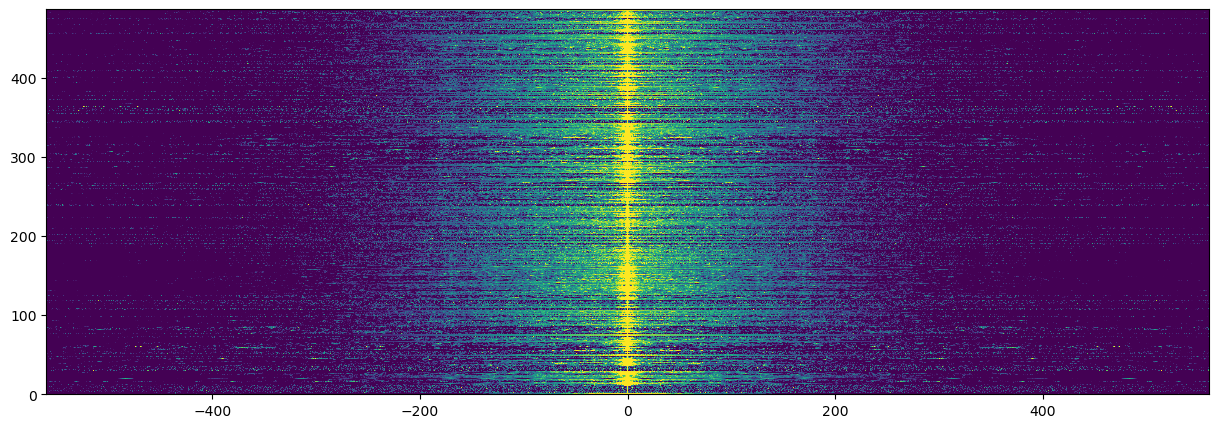

In [265]:
import matplotlib.pyplot as plt
acorr_x = acorr.index.values
plt.figure(figsize=(15, 5))
plt.imshow(acorr.values.T, extent=(-560, 560, 0, len(acorr.keys())), interpolation='none', aspect='auto')
plt.clim([0, 2])

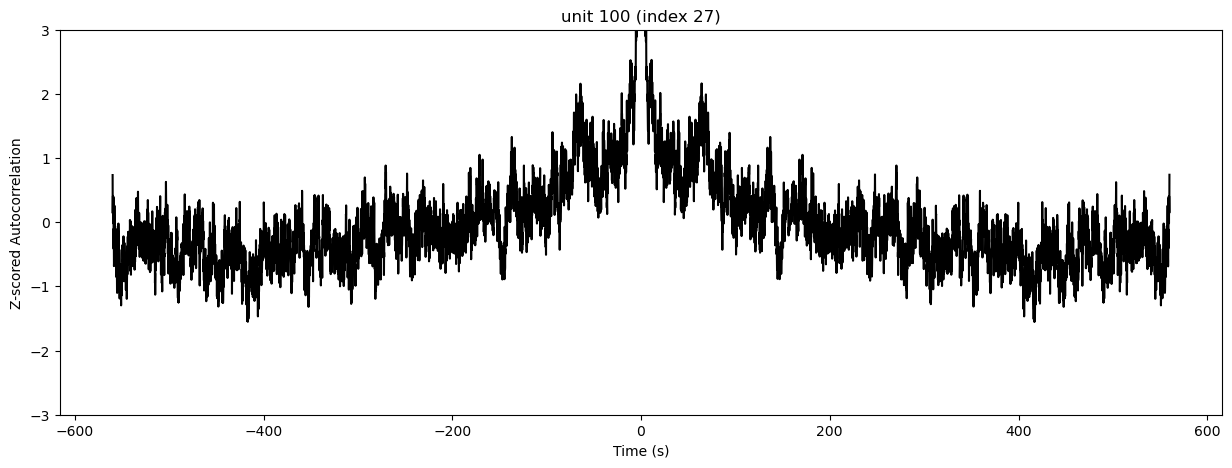

In [266]:
import matplotlib.pyplot as plt
# in mouse 102335, 22 has interesting structure, cells like 32 have very loose, noisy structure
# in mouse 104638, unit 68 (index 18) has a small bump, unit 100 (index 27) has a bump
unit_index = 27
unit_id = acorr.keys()[unit_index]
acorr_x = acorr.index.values
plt.figure(figsize=(15, 5))
plt.plot(
    acorr_x, acorr[unit_id].values, color="black"
)
plt.xlabel("Time (s)")
plt.ylabel("Z-scored Autocorrelation")
plt.ylim([-3, 3])
plt.title(f"unit {unit_id} (index {unit_index})");

In [267]:
from scipy import signal

# nperseg should be power of 2 close to the number of bins in 17.6 minutes (used by their paper)
if binsize == 0.120:
    nperseg = 8196  # 17.6*60/0.120 = 8800
elif binsize == 1:
    nperseg = 1024  # 17.6*60/1 == 1056
else:
    raise ValueError("hard-coded Fs not found")
Pxxs = np.zeros((len(acorr.keys()), int(nperseg/2+1)))

Fs = 1/binsize
for i, key in enumerate(acorr.keys()):
    f, Pxxs[i,:] = signal.welch(acorr[key].values, Fs, window="hamming", nperseg=nperseg)

(0.0, 0.06)

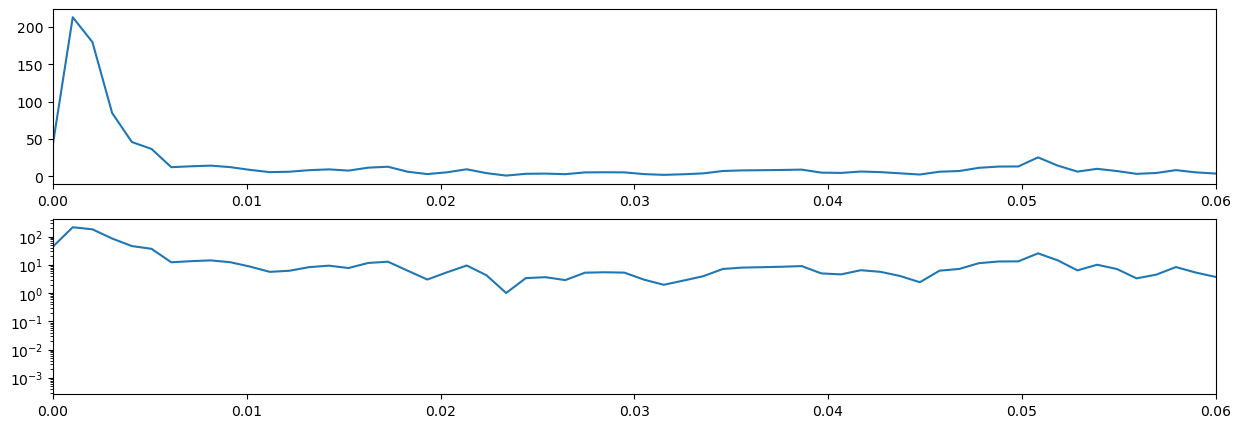

In [268]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.plot(f, Pxxs[0])
plt.xlim([0, 0.06])
plt.subplot(2, 1, 2)
plt.semilogy(f, Pxxs[0])
plt.xlim([0, 0.06])

In [269]:
Pxxs.shape

(487, 4099)

In [270]:
# find first peak of smoothed autocorrelation?

In [271]:
# TODO: find max between f=0.003 and 0.1

In [272]:
ind = np.argsort(np.max(Pxxs, axis=1))[::-1]  # largest power first
ind

array([486, 176, 325,  25, 206, 438,  71, 269, 413,   1,  45, 468, 122,
       256,  91, 108, 222, 458,  34, 138, 197, 381, 204,  31, 191,  37,
       436, 411, 399, 270, 312, 105, 385, 186, 365, 251,  62, 216,  75,
       150, 110,  18, 152,  55, 262, 215, 420, 314, 124,  17, 144, 398,
        84, 305,  72,  98, 166, 232, 241, 459, 328,  43, 473, 348, 422,
       309, 432,  33, 316, 151, 382,  15, 274,  44, 260, 268, 133, 146,
       293, 295, 350, 377, 392, 279, 344, 464, 272, 336, 287, 196, 361,
       278, 444, 156, 202, 258, 374, 148, 451, 345,  21, 100, 367, 102,
       284, 107, 244, 136, 304, 111, 294, 330, 245, 162, 352, 463,  78,
        56, 320, 153, 224, 249, 214, 121, 431, 390, 201, 376, 342, 299,
       387, 472,  99, 460, 317, 271, 313, 310, 447,  36, 357, 154,  10,
        63, 283, 225,  46, 337, 205, 319,  47, 280, 419, 366, 179, 235,
       391, 301, 236, 119, 384, 335,  32,   9, 379, 113, 351, 333,  87,
       353, 217,   6,  73, 118, 221, 354,  35, 157, 210, 187, 46

In [273]:
len(ind)

487

In [274]:
acorr.columns[ind]

Index([1559,  588, 1032,   94,  674, 1411,  230,  846, 1298,    2,
       ...
        694, 1501, 1415,  478,  705,  386,  446,  416, 1148, 1503],
      dtype='int64', length=487)

In [275]:
acorr_sort_by_pxx = acorr.loc[:, acorr.columns[ind]]

In [276]:
acorr_sort_by_pxx

,1559,588,1032,94,674,1411,230,846,1298,2,...,694,1501,1415,478,705,386,446,416,1148,1503
-559.92,-0.453349,-0.764315,-0.886186,-1.555277,-1.308146,-1.367906,-1.422811,-1.444397,-1.477006,-1.608217,...,-0.162466,-0.378886,-0.080848,-0.291755,0.039214,-0.240193,0.149506,0.653724,0.535501,-0.287599
-559.80,-0.658354,-0.776200,-0.978251,-1.510557,-1.485230,-1.527032,-1.296877,-1.426377,-1.494928,-1.598439,...,0.997669,-0.984026,-0.969604,0.121517,-0.394415,0.239320,0.585097,-0.285790,-0.207450,-0.287599
-559.68,-0.630816,-0.825900,-0.977272,-1.543625,-1.243094,-1.379169,-1.318323,-1.506538,-1.474529,-1.626534,...,-0.162466,-0.378886,0.141341,0.638108,0.364435,-0.240193,-0.721675,0.653724,-0.455100,0.611618
-559.56,-0.560441,-0.847509,-1.062482,-1.517643,-1.411746,-1.380468,-1.539651,-1.521679,-1.491066,-1.546845,...,-0.626520,0.528825,-0.969604,-1.118299,0.147621,-0.559869,0.585097,-0.285790,-0.207450,-0.287599
-559.44,-0.438050,-0.806452,-1.056605,-1.537326,-1.571966,-1.308558,-1.187414,-1.505981,-1.456943,-1.550494,...,-0.162466,1.133966,0.141341,-0.601709,-0.394415,-0.240193,0.875491,-0.285790,-0.207450,1.510835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,-0.438050,-0.807533,-1.056605,-1.536696,-1.569557,-1.309064,-1.188100,-1.504866,-1.456943,-1.550640,...,-0.162466,1.133966,0.141341,-0.601709,-0.394415,-0.240193,0.875491,-0.285790,-0.207450,1.510835
559.56,-0.560441,-0.845348,-1.063461,-1.517958,-1.415360,-1.381118,-1.539994,-1.521958,-1.490563,-1.545896,...,-0.626520,0.528825,-0.969604,-1.118299,0.147621,-0.559869,0.585097,-0.285790,-0.207450,-0.287599
559.68,-0.636936,-0.828061,-0.975313,-1.543782,-1.243094,-1.379169,-1.317809,-1.507096,-1.475788,-1.627483,...,-0.162466,-0.378886,0.141341,0.638108,0.364435,-0.240193,-0.721675,0.653724,-0.455100,0.611618
559.80,-0.652235,-0.775119,-0.978251,-1.509927,-1.482821,-1.526888,-1.295847,-1.425634,-1.494382,-1.599023,...,0.997669,-0.984026,-0.969604,0.121517,-0.394415,0.239320,0.585097,-0.285790,-0.207450,-0.287599


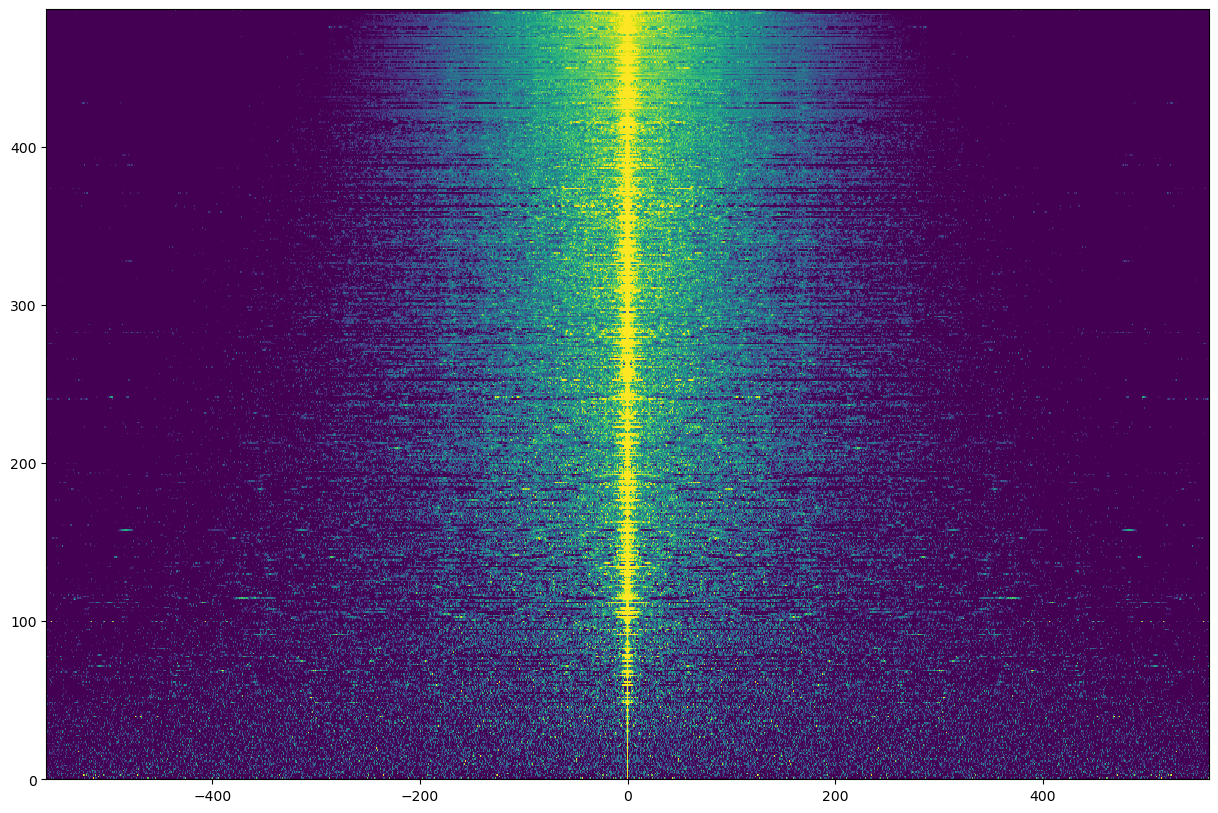

In [279]:
plt.figure(figsize=(15, 10))
plt.imshow(acorr_sort_by_pxx.values.T, extent=(-560, 560, 0, len(acorr.keys())), interpolation='none', aspect='auto')
plt.clim([0, 2])

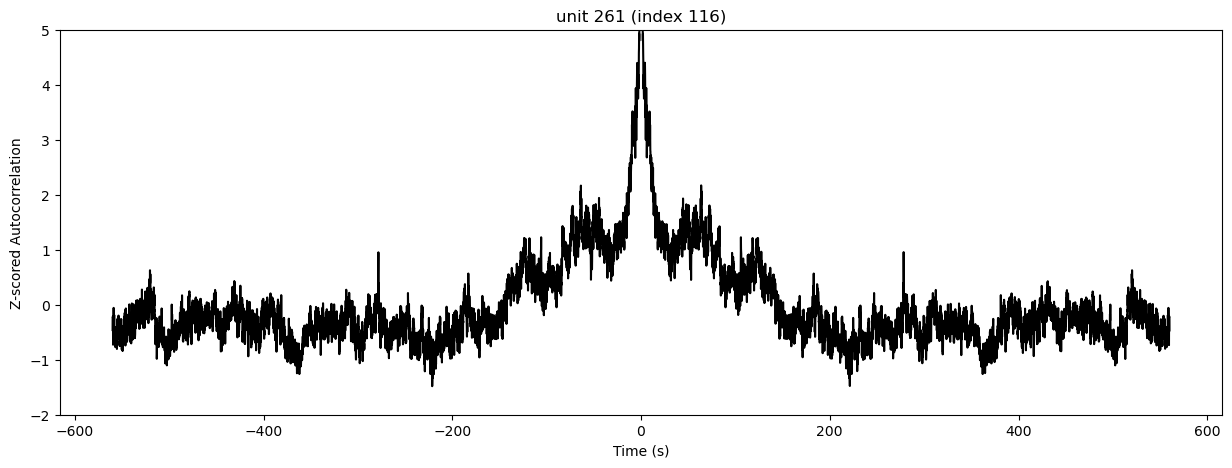

In [355]:
import matplotlib.pyplot as plt
# in mouse 104638, unit 533 (sorted index 113) has interesting structure
# in mouse 104638, unit 261 (sorted index 116) has interesting structure
unit_index = 116
unit_id = acorr_sort_by_pxx.keys()[unit_index]
acorr_x = acorr_sort_by_pxx.index.values
plt.figure(figsize=(15, 5))
plt.plot(
    acorr_x, acorr_sort_by_pxx[unit_id].values, color="black"
)
plt.xlabel("Time (s)")
plt.ylabel("Z-scored Autocorrelation")
plt.ylim([-2, 5])
plt.title(f"unit {unit_id} (index {unit_index})");

In [338]:
trimmed_mec_tsgroup_wheel = mec_tsgroup_wheel.restrict(nap.IntervalSet(start=wheel_start+5*60, end=max(smoothed_binned_matrix_binary.times())))

In [343]:
len(trimmed_mec_tsgroup_wheel[unit_id])

682

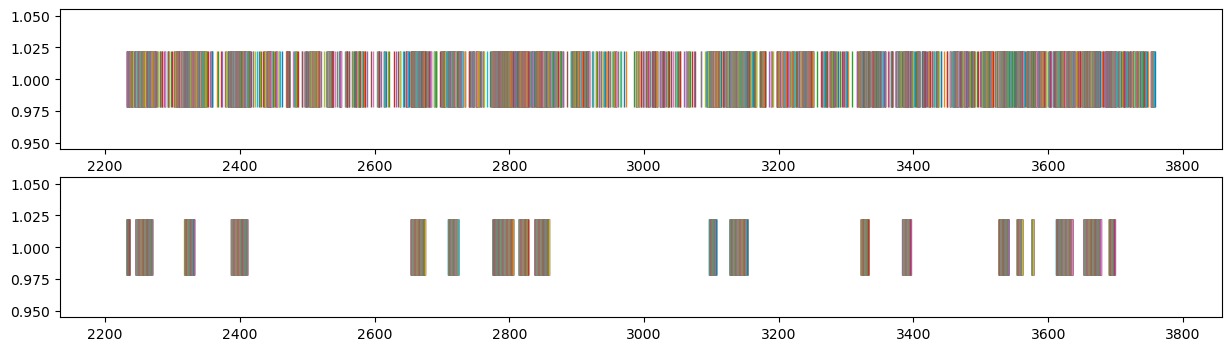

In [354]:
unit_id = 261
plt.figure(figsize=(15, 4))
plt.subplot(2, 1, 1)
n_time = len(trimmed_mec_tsgroup_wheel[unit_id])
for i in range(n_time):
    plt.plot(trimmed_mec_tsgroup_wheel[unit_id].t[i], 1, "|", markersize=40)
plt.xlim(trimmed_mec_tsgroup_wheel[unit_id].t[[0, -1]] + [-100, 100])
plt.subplot(2, 1, 2)
n_time = len(trimmed_smoothed_binned_matrix_binary.loc[unit_id])
for i in range(n_time):
    if trimmed_smoothed_binned_matrix_binary.loc[unit_id][i]:
        plt.plot(trimmed_smoothed_binned_matrix_binary.t[i], 1, "|", markersize=40)
plt.xlim(trimmed_mec_tsgroup_wheel[unit_id].t[[0, -1]] + [-100, 100])
plt.show()

In [345]:
len(trimmed_mec_tsgroup_wheel[unit_id])

682

In [346]:
len(trimmed_smoothed_binned_matrix_binary.loc[unit_id])

12833

In [316]:
trimmed_smoothed_binned_matrix_binary

Time (s)      1    2    21    22    24  ...
----------  ---  ---  ----  ----  ----  -----
2232.06       0    0     0     0     0  ...
2232.18       0    0     0     0     0  ...
2232.3        0    0     0     0     0  ...
2232.42       0    0     0     0     0  ...
2232.54       0    0     0     0     0  ...
2232.66       0    0     0     0     0  ...
2232.78       0    0     0     0     0  ...
...
3771.18       0    0     0     0     0  ...
3771.3        0    0     0     0     0  ...
3771.42       0    0     0     0     0  ...
3771.54       0    0     0     0     0  ...
3771.66       0    0     0     0     0  ...
3771.78       0    0     0     0     0  ...
3771.9        0    0     0     0     0  ...
dtype: float32, shape: (12833, 487)

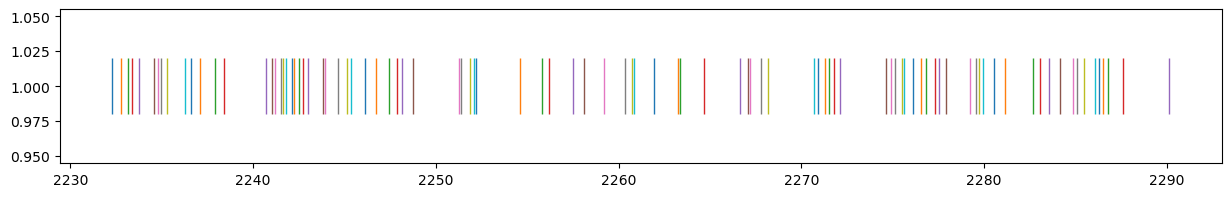